In [22]:
from pathlib import Path

import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from skimage import filters
from skimage import util

In [2]:
# Constants

DATA_DIR = Path('../data/ircad_numpy/data/patients')

In [3]:
def reset_paths():
    scans = DATA_DIR.glob('*/scans_512.npy')
    masks = DATA_DIR.glob('*/masks_512.npy')
    
    return scans, masks

In [4]:
scans, masks = reset_paths()

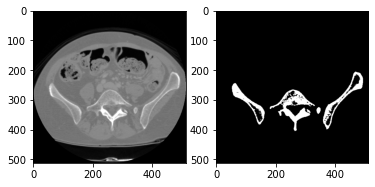

In [5]:
fig, axes = plt.subplots(1,2)
axes[0].imshow(np.squeeze(np.load(next(scans)))[0], cmap='gray')
axes[1].imshow(np.squeeze(np.load(next(masks)))[0], cmap='gray')

In [30]:
scans, masks = reset_paths()

In [44]:
f1_scores = []

In [46]:
# Loop over generators
for scan_loc, mask_loc in zip(scans, masks):
    # Hardcoding ignore patient 2 because the mask and scan size is (0,) 
    if "patient_2" in scan_loc.parent.name:
        continue
    all_scans = np.load(scan_loc)
    all_masks = np.load(mask_loc)
    
    # Loop over each patient's scans and masks
    for scan, mask in zip(all_scans, all_masks):
        
        # Remove extra dimension
        scan = np.squeeze(scan)
        mask = np.squeeze(mask)
        
        # Create a temporary inverted image as otsu finds darkest pixels
        inv_scan = util.invert(scan)
        
        # Threshold the scan
        thresh = filters.threshold_yen(scan, nbins=512)
        pred = scan >= thresh
        
        # Caculate teh f1 score
        f1_scores.append(f1_score(mask.flatten(), pred.flatten()))
        
        # For visualisation
#        fig, axes = plt.subplots(1,3)
#        axes[0].imshow(scan, cmap='gray')
#        axes[1].imshow(mask, cmap='gray')
#        axes[2].imshow(pred, cmap='gray')
#        break
#    break

In [48]:
print(f"The mean f1 score is {np.mean(f1_scores)}")

The mean f1 score is 0.6011922815163961
